Basic analytics of activity of geo-vuln users who replied to others in keyword dataset (repliers only)

In [2]:
import pandas as pd
import numpy as np
import matplotlib
from collections import Counter
from scipy.stats import lognorm

%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

In [4]:
df_oneSide=pd.read_csv('../data/bbContextOntopicRepliesOnlyDF.csv',sep=';')

In [4]:
df_oneSide.columns

Index([u'id', u'username', u'user_id', u'geo_enabled', u'followCount',
       u'friendCount', u'faveCount', u'tweetCount', u'date', u'timing',
       u'coordinates', u'location', u'source', u'retweetCount', u'isRetweet',
       u'origTweet', u'origUser', u'origTime', u'origPlace',
       u'origUserCreated', u'contributors', u'hashtags', u'has_media', u'urls',
       u'mentions', u'replyWho', u'replyWhat', u'text'],
      dtype='object')

In [5]:
df_oneSide['dateObj']=pd.to_datetime(df_oneSide.date)

In [6]:
df_oneSide=df_oneSide.sort(['user_id','dateObj'])

-c:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [7]:
replies=df_oneSide[df_oneSide.replyWho!='0']

In [8]:
len(replies)

562512

So more than a quarter of these tweets are replies

In [15]:
grouped=df_oneSide.groupby('user_id')

In [16]:
df_oneSide['secDiff']=(grouped.dateObj.diff()).apply(lambda x: np.nan if pd.isnull(x) else x.item()/(10**9))

In [17]:
data = df_oneSide.secDiff.dropna().tolist()

In [12]:
shape, loc, scale = lognorm.fit(data, floc=0)

In [13]:
bins=np.logspace(0, int(np.log(max(data))), 100)
width=bins[1:]-bins[:-1]

In [14]:
fit = lognorm.pdf( bins, shape, loc=loc, scale=scale )

(0, 0.05)

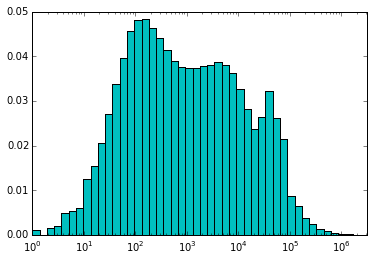

In [15]:
h, b=np.histogram(data,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.05)

**Takeway** 
* People take three kinds of breaks between tweets: less than 16 min, between 16 & 3 hours, and about a day.
* Most people live in 16 min break world, less live in 16min-3hour world, and even less live in a day world

# Get the distribution of inter-reply times

In [19]:
freq=replies.groupby(replies.user_id).size()

In [20]:
len(freq)

7205

In [21]:
f=Counter(freq.values)

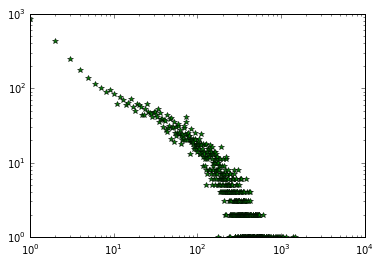

In [22]:
plt.loglog(f.keys(),f.values(),'g*')

In [18]:
grouped=replies.groupby('user_id')

In [19]:
replies['secDiff']=(grouped.dateObj.diff()).apply(lambda x: np.nan if pd.isnull(x) else x.item()/(10**9))

-c:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [20]:
data=replies.secDiff.dropna().tolist()

(1.0, 3162277.6601683795)

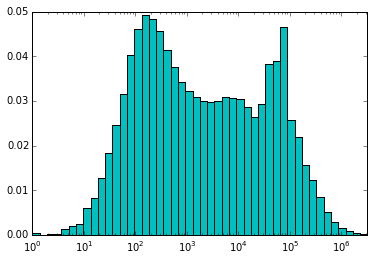

In [44]:
bins=np.logspace(0, int(np.log(max(data))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(data,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
#plt.ylim(ymin=0, ymax=10**4*2.8)

In [27]:
len(replies[~replies.secDiff.isnull()])/float(len(replies))

0.987191384361578

In [28]:
len((replies.user_id[~replies.secDiff.isnull()]).unique())/float(len(replies.user_id.unique()))

0.8803608605135322

So only 2% of tweets are missed, but 12% of the users don't have more than one reply

**Takeway** 
* People take three kinds of breaks between replies: less than 16 min, between 16 & 3 hours, and about a day.
* These are the same kind of breaks people take between tweets
* So as temporal practice, replying to something has the same temporal patterns as just tweeting
* But in replying, more people live in a day break world - almost as many as in the 16 min world

# Inter-reply times in different disaster stages

In [21]:
before=replies[replies.dateObj<pd.to_datetime('2012-10-27 00:00:00')]

In [22]:
during=replies[(replies.dateObj>=pd.to_datetime('2012-10-27 00:00:00')) & (replies.dateObj<=pd.to_datetime('2012-11-04 11:59:59'))]

In [23]:
after=replies[replies.dateObj>=pd.to_datetime('2012-11-05 00:00:00')]

In [24]:
bSecDiff=before.secDiff.dropna().tolist()

In [25]:
dSecDiff=during.secDiff.dropna().tolist()

In [26]:
aSecDiff=after.secDiff.dropna().tolist()

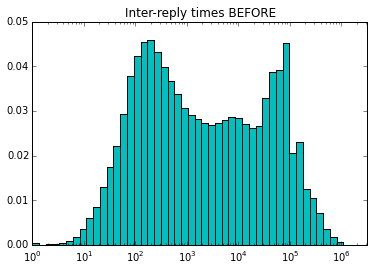

In [27]:
bins=np.logspace(0, int(np.log(max(bSecDiff))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(bSecDiff,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.title('Inter-reply times BEFORE')

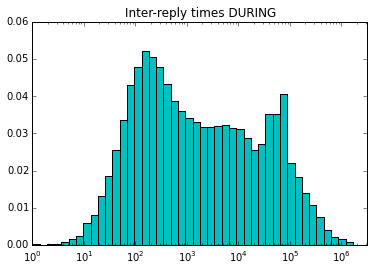

In [50]:
bins=np.logspace(0, int(np.log(max(dSecDiff))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(dSecDiff,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.title('Inter-reply times DURING')

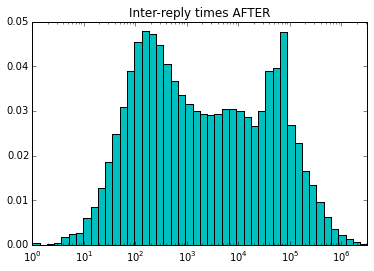

In [53]:
bins=np.logspace(0, int(np.log(max(aSecDiff))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(aSecDiff,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.title('Inter-reply times AFTER')

**Takeway**
* The same temporal practice is present in different disaster stages
* But during, the about-a-day world is less populous than before or after
* So in crisis, some people shift from one practice (a day) to another (16 mins goes up)

# Compare the timing of the ontopic vs offtopic tweets

In [15]:
ontopic=np.fromfile('/home/mako0970/ReplyPaperNew/data/bbRepliersOnlyKeywordTweets.csv', sep=',')

In [55]:
len(ontopic)

126812

In [16]:
ontopDF=df_oneSide[df_oneSide.id.isin(ontopic)]

In [59]:
len(ontopDF)

114896

In [17]:
nontopDF=df_oneSide[~df_oneSide.id.isin(ontopic)]

In [61]:
len(nontopDF)

1748912

Recalculate secDiff, b/c it's different here since it's only keyword (ontopic) tweets

In [18]:
grouped=ontopDF.groupby('user_id')
ontopDF['secDiff']=(grouped.dateObj.diff()).apply(lambda x: np.nan if pd.isnull(x) else x.item()/(10**9))

-c:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [64]:
ontopicSecDiff=ontopDF.secDiff.dropna().tolist()

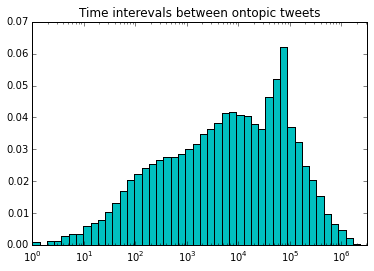

In [65]:
bins=np.logspace(0, int(np.log(max(ontopicSecDiff))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(ontopicSecDiff,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.title('Time interevals between ontopic tweets')

In [19]:
grouped=nontopDF.groupby('user_id')
nontopDF['secDiff']=(grouped.dateObj.diff()).apply(lambda x: np.nan if pd.isnull(x) else x.item()/(10**9))

-c:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [77]:
nontopicSecDiff=nontopDF.secDiff.dropna().tolist()

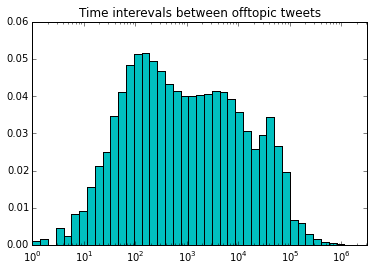

In [78]:
bins=np.logspace(0, int(np.log(max(nontopicSecDiff))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(nontopicSecDiff,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.title('Time interevals between offtopic tweets')

**Takeway**
* Off topic tweets have pretty much the same temporal patterns as tweets overall
* On topic tweets have vurves with more or less the same centers, but all the mass is pushed towards the once a day practice
* So hurricane related communication fits into existing comm practice, just the more infrequent part of it?

# Compare the timing of ontopic and offtopic Replies (one side)

In [20]:
ontopRep=ontopDF[ontopDF.replyWho!='0']

In [21]:
nontopRep=nontopDF[nontopDF.replyWho!='0']

In [71]:
len(ontopRep)

17154

In [72]:
len(nontopRep)

545358

Redo secDiff again, because now it's ontopic and Replies only

In [22]:
grouped=ontopRep.groupby('user_id')
ontopRep['secDiff']=(grouped.dateObj.diff()).apply(lambda x: np.nan if pd.isnull(x) else x.item()/(10**9))

-c:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [23]:
grouped=nontopRep.groupby('user_id')
nontopRep['secDiff']=(grouped.dateObj.diff()).apply(lambda x: np.nan if pd.isnull(x) else x.item()/(10**9))

-c:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [80]:
ontopRepSecDiff=ontopDF.secDiff.dropna().tolist()

In [81]:
nontopRepSecDiff=nontopDF.secDiff.dropna().tolist()

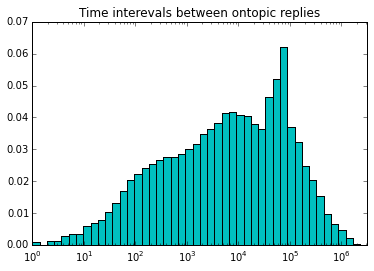

In [82]:
bins=np.logspace(0, int(np.log(max(ontopRepSecDiff))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(ontopRepSecDiff,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.title('Time interevals between ontopic replies')

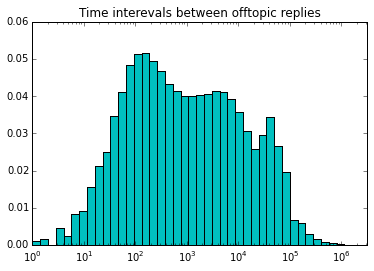

In [84]:
bins=np.logspace(0, int(np.log(max(nontopRepSecDiff))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(nontopRepSecDiff,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.title('Time interevals between offtopic replies')

**Takeway**
The on topic and off topic replies follow pretty much the same patterns as on and off topic tweets

# Explore who reply tweets are replying to

In [35]:
KeyRepliedToTweets=np.fromfile('/home/mako0970/ReplyPaperNew/data/bbRepliedToKeywordTweets.csv', sep=',')

In [36]:
len(KeyRepliedToTweets)

30350

In [37]:
inter=list(set(replies.replyWhat.unique()) & set(KeyRepliedToTweets))

In [38]:
len(inter)

50

Only 50 tweets there were replied to by bb users were ontopic!!! So nothing to be glead here

<b> But how about replies to ontopic USERS (those who had ontopic tweets)</b>

In [49]:
ontopUsernamesRepliedTo=np.loadtxt('/home/mako0970/ReplyPaperNew/data/bbRepliedToKeywordUsernames.csv', dtype=str,delimiter=',')

In [50]:
len(ontopUsernamesRepliedTo)

2857

In [51]:
ontopRepliedTo=replies[replies.replyWho.isin(ontopUsernamesRepliedTo)]

In [52]:
nontopRepliedTo=replies[~replies.replyWho.isin(ontopUsernamesRepliedTo)]

In [53]:
grouped=ontopRepliedTo.groupby('user_id')
ontopRepliedTo['secDiff']=(grouped.dateObj.diff()).apply(lambda x: np.nan if pd.isnull(x) else x.item()/(10**9))

-c:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [54]:
grouped=nontopRepliedTo.groupby('user_id')
nontopRepliedTo['secDiff']=(grouped.dateObj.diff()).apply(lambda x: np.nan if pd.isnull(x) else x.item()/(10**9))

-c:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [55]:
ontopRepliedToSecDiff=ontopRepliedTo.secDiff.dropna().tolist()

In [56]:
nontopRepliedToSecDiff=nontopRepliedTo.secDiff.dropna().tolist()

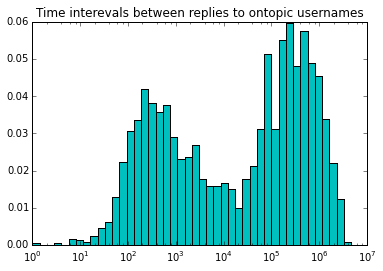

In [59]:
bins=np.logspace(0, int(np.log(max(ontopRepliedToSecDiff))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(ontopRepliedToSecDiff,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**7)
plt.title('Time interevals between replies to ontopic usernames')

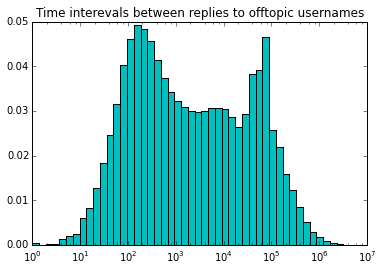

In [60]:
bins=np.logspace(0, int(np.log(max(nontopRepliedToSecDiff))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(nontopRepliedToSecDiff,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**7)
plt.title('Time interevals between replies to offtopic usernames')